# <center>Data Mining Project Code</center>

** **
## <center>*Temporal Data Segmentation*</center>

** **

In this notebook, we will implement different clustering methods in order to analyse and group customers by temporal-related features.

** **
The members of the `team` are:
- Ana Farinha  - 20211514
- António Oliveira - 20211595
- Mariana Neto - 20211527
- Salvador Domingues - 20240597


# ToC

<a class="anchor" id="top"></a>


1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data) <br><br>

2. [Clustering](#2.-Clustering) <br>

    2.1 [Hierarchical Clustering](#2.1-Hierarchical-Clustering) <br><br>
    2.2 [K-Means](#2.2-K-Means) <br><br>
    2.3 [Self-Organizing Maps (SOM)](#2.3-Self-Organizing-Maps-(SOM)) <br><br>
    2.4 [Density-based Clustering](#2.4-Density-based-Clustering) <br><br>
    
    &emsp; 2.4.1 [Meanshift](#2.4.1-Meanshift)<br><br>
    &emsp; 2.4.2 [DBScan](#2.4.2-Density-Based-Spatial-Clustering-of-Applications-with-Noise-(DBSCAN))<br><br>
    &emsp; 2.4.3 [HDBScan](#2.4.3-HDBScan)<br><br>
    
    
    
    
 

# 1. Importing Libraries & Data

In [8]:
import pandas as pd
import numpy as np
from IPython.display import display 

# Scalers
from sklearn.preprocessing import RobustScaler, StandardScaler, \
                                  MinMaxScaler

# Clustering algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

# Segmentation
import segmentation as s

# Visualizations
import matplotlib.pyplot as plt
import functions as f

pd.set_option('display.max_columns', None)

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

path = './plots/temporal_data/'

In [3]:
data = pd.read_csv('data/preprocessed_data.csv', 
                   index_col = "customer_id")
temp_data = data[s.temporal_data]
temp_data

,first_order,last_order,days_between,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,0_7h,8_14h,15_19h,20_23h
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2,0
5d272b9dcb,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,2,0,0
f6d1b2ba63,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,2,0,0
180c632ed8,0,2,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,0,0
4eb37a6705,0,2,2,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f4e366c281,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
f6b6709018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
f74ad8ce3f,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


In [4]:
temp_data.describe().T

,count,mean,std,min,25%,50%,75%,max
first_order,31828.0,28.367538,24.116981,0.0,7.0,22.0,45.0,90.0
last_order,31828.0,63.666740,23.231670,0.0,49.0,70.0,83.0,90.0
days_between,31828.0,35.299202,29.437903,0.0,3.0,34.0,62.0,90.0
HR_0,31828.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
HR_1,31828.0,0.053726,0.316398,0.0,0.0,0.0,0.0,14.0
HR_2,31828.0,0.063183,0.351663,0.0,0.0,0.0,0.0,12.0
HR_3,31828.0,0.118386,0.497201,0.0,0.0,0.0,0.0,11.0
HR_4,31828.0,0.101609,0.437411,0.0,0.0,0.0,0.0,14.0
HR_5,31828.0,0.081846,0.358645,0.0,0.0,0.0,0.0,7.0
HR_6,31828.0,0.069718,0.329540,0.0,0.0,0.0,0.0,8.0


# 2. Clustering

<a href="#top">Top &#129033;</a>

**Scale Data Before Clustering**

In [6]:
scaled_data_mm = MinMaxScaler().fit_transform(temp_data)
scaled_data_ss = StandardScaler().fit_transform(temp_data)

In [7]:
scaled_data_mm = pd.DataFrame(scaled_data_mm, 
                           columns=temp_data.columns, 
                           index=temp_data.index)

scaled_data_ss = pd.DataFrame(scaled_data_ss, 
                           columns=temp_data.columns, 
                           index=temp_data.index)

## 2.1 Hierarchical Clustering

To develop a clustering solution using hierarchical clustering, the following steps were carried out:

**1. Creating Dendrograms for All Combinations**
- Dendrograms were generated for all combinations of linkage methods (e.g., single, complete, average, ward) and distance metrics (e.g., Euclidean, Manhattan).
- This step provided a visual representation of the clustering hierarchy to understand how clusters merge at different thresholds.
- The dendrograms were analysed to identify configurations that produced distinct and meaningful clusters.

**2. Selecting the Best Combinations**
- Based on the dendrograms, the most promising combinations of linkage methods and distance metrics were shortlisted.
- The selection was based on:
  - Clear separation of clusters (visible gaps in the dendrograms).
  - Avoidance of configurations that produced excessive chaining effects or imbalanced clusters.
- This step narrowed the scope to the most viable configurations.

**3. Evaluating the Shortlisted Combinations**
- The shortlisted configurations were quantitatively evaluated using the following metrics:
  - **R² Score**: Measures how well the clustering structure explains the variance in the data. Higher values indicate a better-defined cluster structure.
  - **Silhouette Score**: Evaluates the compactness and separation of clusters. Scores range from -1 (poor clustering) to 1 (ideal clustering), providing insights into cluster quality.
  - **Calinski-Harabasz Score**: Assesses the ratio of the sum of cluster dispersion to inter-cluster distances. Higher values indicate well-separated and compact clusters.
- By leveraging these metrics, the combination of linkage methods and distance metrics producing the highest-quality clusters was identified and selected.

<a href="#top">Top &#129033;</a>

In [9]:
linkages = ["complete", "average", "single", "ward"]

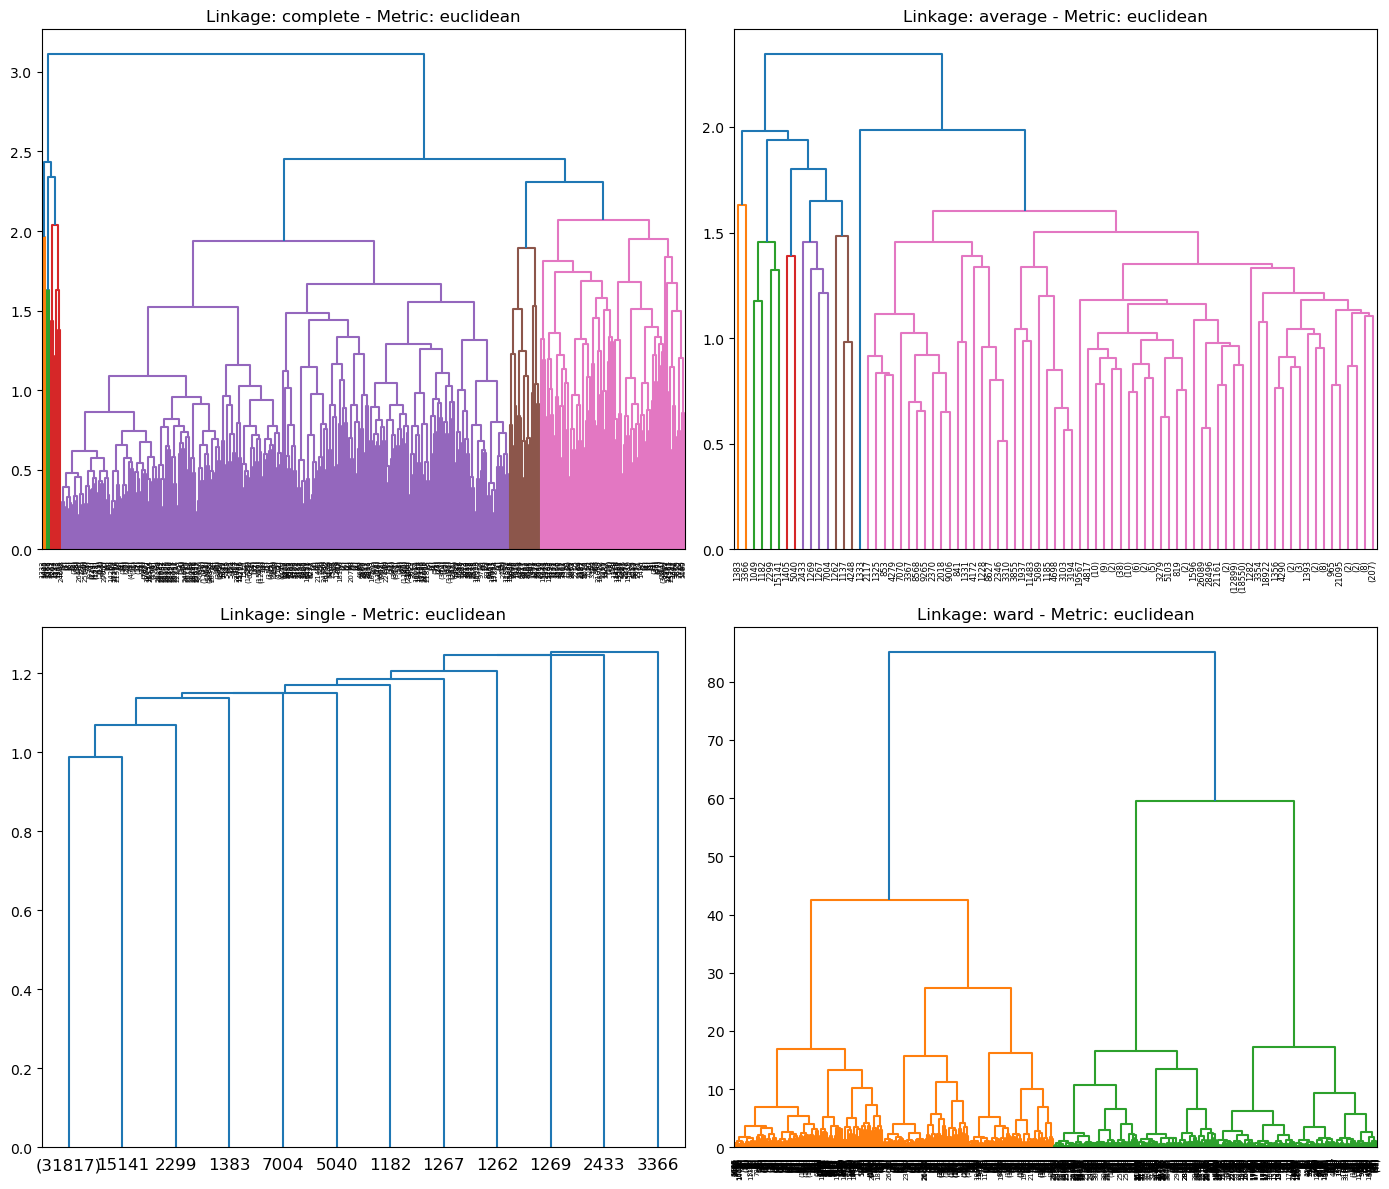

In [15]:
f.plot_hierarchical_dendrograms(scaled_data_mm, 
                                path=path+'euclidean', 
                                linkages=linkages, 
                                metrics=['euclidean'])

In [17]:
hr_results = []

# Define clustering settings
cluster_settings = [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'ward', "metric": 'euclidean'}
    for k in range(2, 9)  
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'complete', "metric": 'l2'}
    for k in range(2, 7)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'average', "metric": 'manhattan'}
    for k in range(2, 6) 
]

# Loop over settings and evaluate models
for settings in cluster_settings:
    result = f.create_and_evaluate_model(df=scaled_data_mm, feats=scaled_data_mm.columns.tolist(), **settings)
    hr_results.append(result)

# Convert results to DataFrame
hr_results_df = pd.DataFrame(hr_results)
hr_results_df

,Model,n_clusters,linkage,metric,R2,Silhouette,Calinski-Harabasz
0,hierarchical,2,ward,euclidean,0.370718,0.337491,18749.109173
1,hierarchical,3,ward,euclidean,0.552005,0.366893,19606.878996
2,hierarchical,4,ward,euclidean,0.644521,0.287397,19233.393039
3,hierarchical,5,ward,euclidean,0.682897,0.247450,17133.095253
4,hierarchical,6,ward,euclidean,0.698244,0.208452,14726.787168
5,hierarchical,7,ward,euclidean,0.712827,0.192205,13164.470873
6,hierarchical,8,ward,euclidean,0.726733,0.151253,12088.960810
7,hierarchical,2,complete,l2,0.005124,0.702789,163.927334
8,hierarchical,3,complete,l2,0.184129,0.246177,3591.197732
9,hierarchical,4,complete,l2,0.184506,0.246085,2400.063634


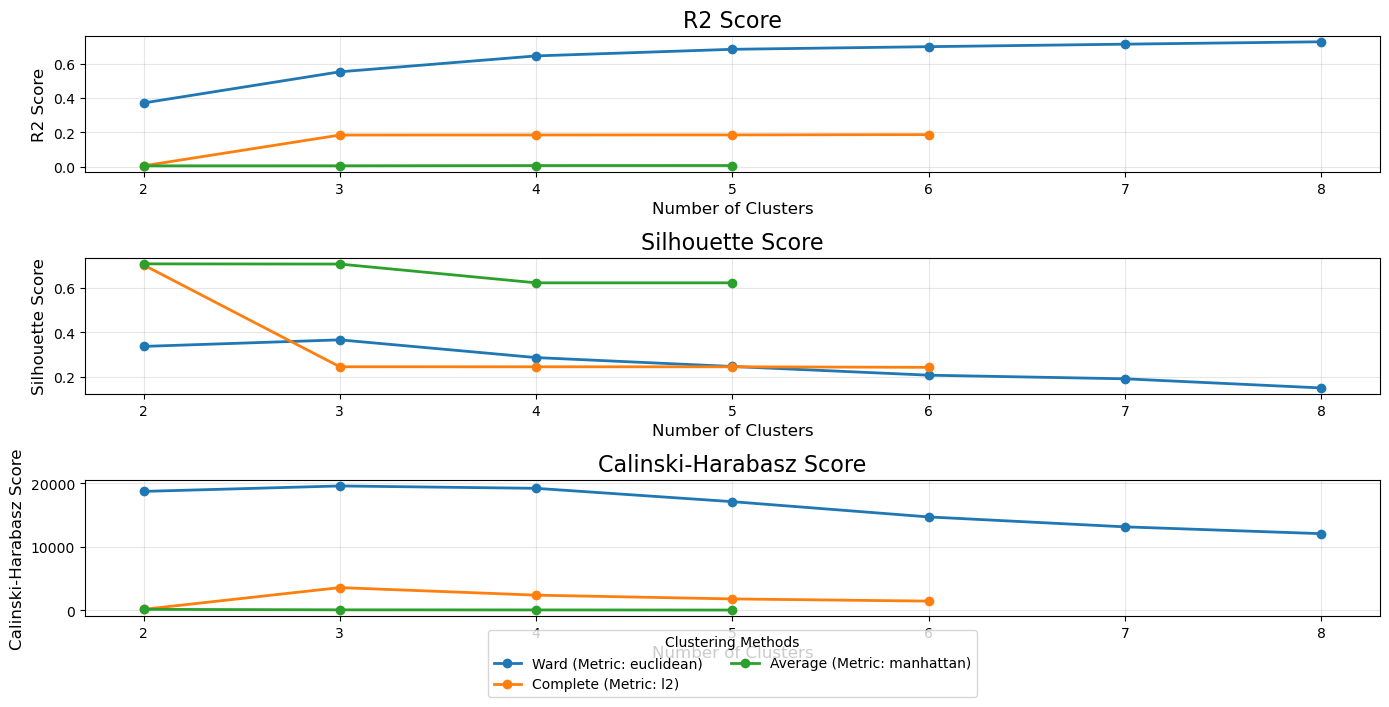

In [19]:
f.plot_evaluation_scores(hr_results_df, path)

**Final Solution for Hierarchical Clustering**

In [46]:
# linkage = None
# distance = None
# n_clusters = None

# hclust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=n_clusters)

# hc_labels = hclust.fit_predict(temp_data)

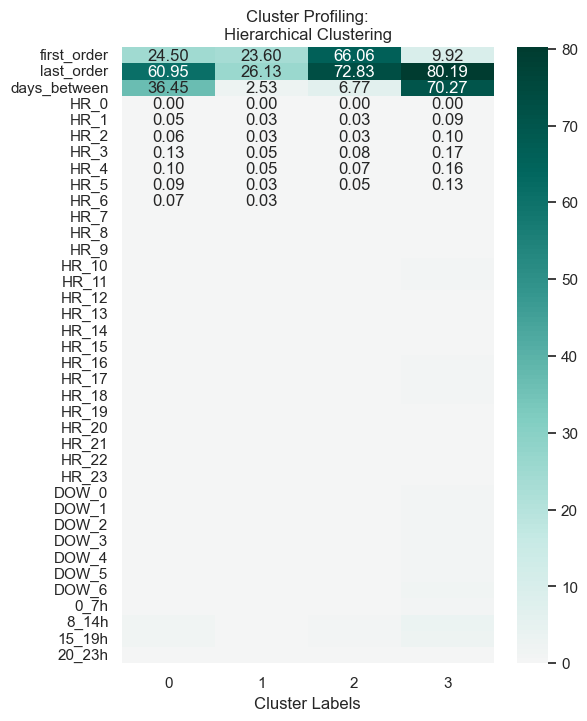

In [49]:
f.plot_cluster_profiling(temp_data, hc_labels, "Hierarchical")

## 2.2 K-Means

<a href="#top">Top &#129033;</a>

**Elbow Method**

In [9]:
dispersion = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    dispersion.append(kmeans.inertia_)

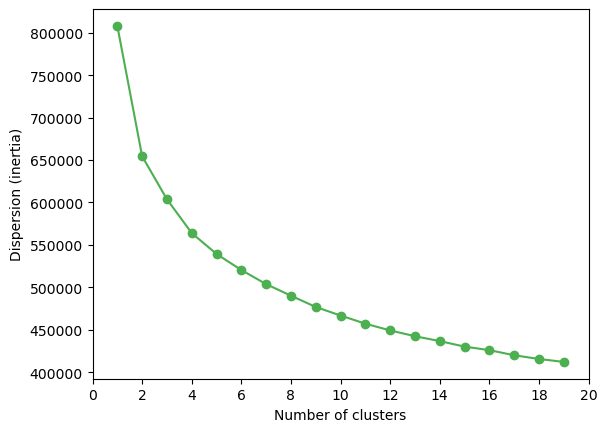

In [10]:
plt.plot(range(1, 20), dispersion, marker='o', color='#4CAF50')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.xticks(np.arange(0, 21, step=2))  
#plt.vlines(7, 5000, 600000, color='red')

plt.show()

In [22]:
results_kmeans = []

# Define clustering settings
cluster_settings = [
    {"model_type": "kmeans", "n_clusters": k, 'random_state': 42, 'n_init': 20, 'init':'k-means++'} for k in range(2, 9)
]

# Loop over settings and evaluate models
for settings in cluster_settings:
    result = f.create_and_evaluate_model(df=scaled_data_mm, feats=scaled_data_mm.columns.tolist(), **settings)
    results_kmeans.append(result)

# Convert results to DataFrame
results_kmeans_df = pd.DataFrame(results_kmeans)
results_kmeans_df

,Model,n_clusters,random_state,n_init,init,R2,Silhouette,Calinski-Harabasz
0,kmeans,2,42,20,k-means++,0.428621,0.381195,23874.283402
1,kmeans,3,42,20,k-means++,0.614884,0.402737,25406.173653
2,kmeans,4,42,20,k-means++,0.675009,0.315533,22032.858076
3,kmeans,5,42,20,k-means++,0.703728,0.299485,18897.097211
4,kmeans,6,42,20,k-means++,0.732081,0.281035,17390.540218
5,kmeans,7,42,20,k-means++,0.755749,0.289522,16409.833632
6,kmeans,8,42,20,k-means++,0.768609,0.251213,15099.445278


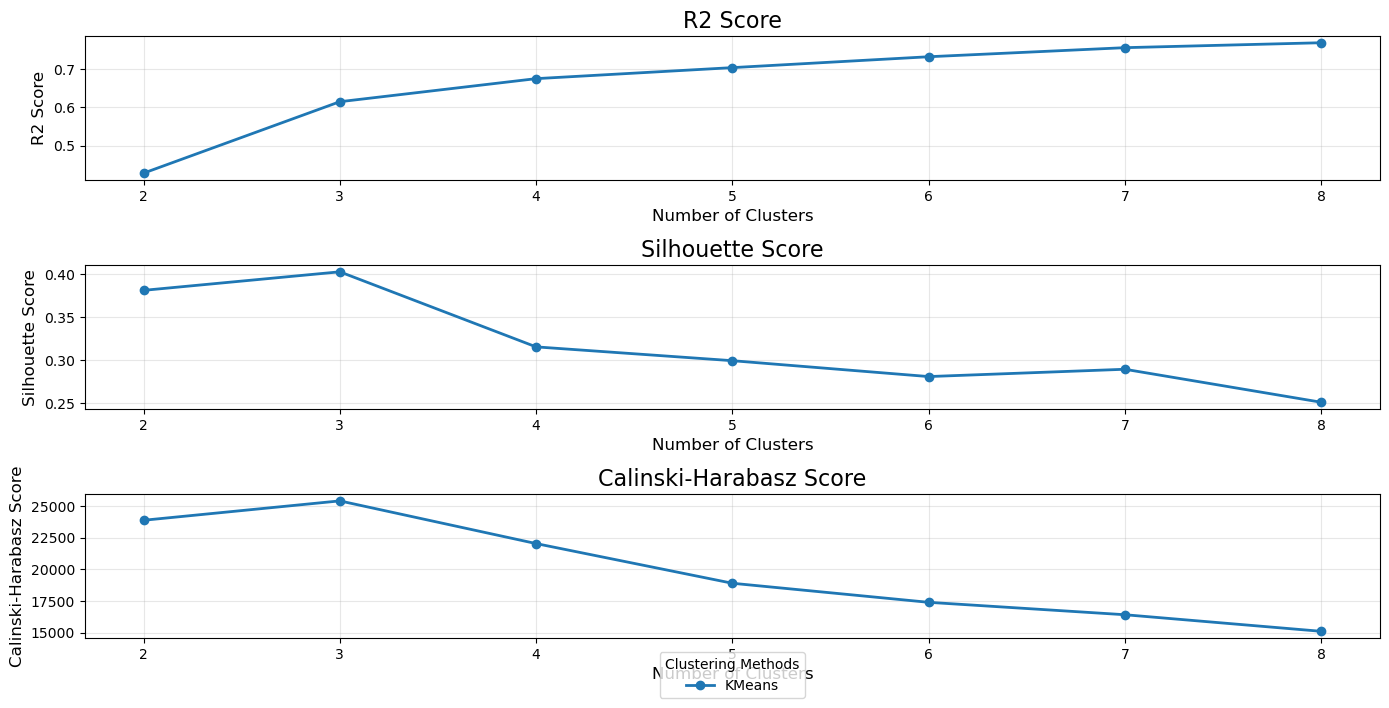

In [24]:
f.plot_evaluation_scores(results_kmeans_df, path)

In [23]:
import play_song as s
s.play_('audio.mp3')

Input #0, wav, from '/var/folders/mm/fxsq_1490x9dd2w76tqvt3kr0000gn/T/tmpuzykbped.wav':
  Duration: 00:00:10.00, bitrate: 1536 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 48000 Hz, 2 channels, s16, 1536 kb/s


**Final Solution for K-Means**

In [14]:
# number_clusters = 3
# kmclust = KMeans(n_clusters=number_clusters, 
#                  init='k-means++', 
#                  n_init=15, 
#                  random_state=1)

# km_labels = kmclust.fit_predict(temp_data)
# km_labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

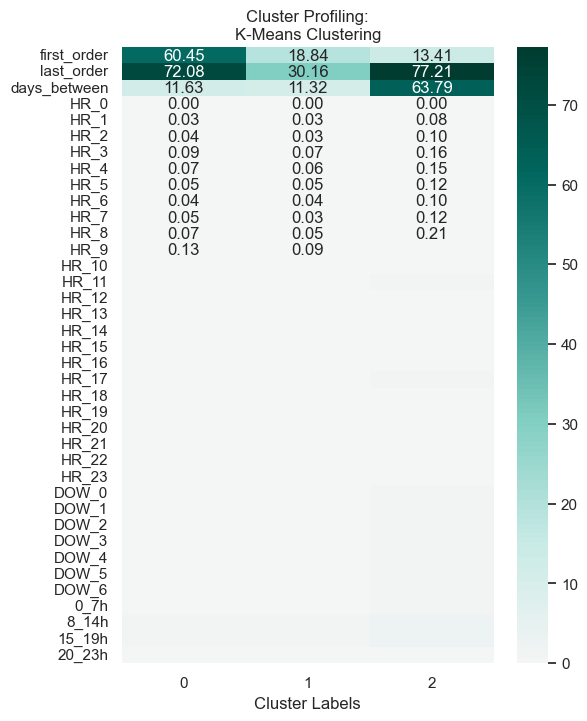

In [50]:
f.plot_cluster_profiling(temp_data, km_labels, "K-Means")

## 2.3 Self-Organizing Maps (SOM)

<a href="#top">Top &#129033;</a>

## 2.4 Density-based Clustering

<a href="#top">Top &#129033;</a>

In [7]:
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth
from hdbscan import HDBSCAN
from sklearn.neighbors import NearestNeighbors

### 2.4.1 Meanshift

<a href="#top">Top &#129033;</a>

In [26]:
bandwidth = estimate_bandwidth(scaled_data_mm)#, 
                               #quantile=0.5, 
                               #random_state=1, 
                               #n_jobs=-1)
bandwidth

4.6813956067698435

In [27]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4)
temp_data['meanshift'] = ms.fit_predict(scaled_data)

temp_data['meanshift'].nunique()

137

In [89]:
#plot_cluster_counts(temp_data, 'dbscan_cluster_1')

In [ ]:
# ms_results = []

# # Define clustering settings
# cluster_settings = [
#     {"model_type": "meanshift", "eps": k}
#     for k in range(5, 15)  
# ]
# # Loop over settings and evaluate models
# for settings in cluster_settings:
#     result = create_and_evaluate_model2(df=scaled_data, feats=scaled_data.columns.tolist(), **settings)
#     ms_results.append(result)

# # Convert results to DataFrame
# ms_results_df = pd.DataFrame(ms_results)
# ms_results_df

### 2.4.2 Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

<a href="#top">Top &#129033;</a>

**Optimimising *Eps* Parameter**

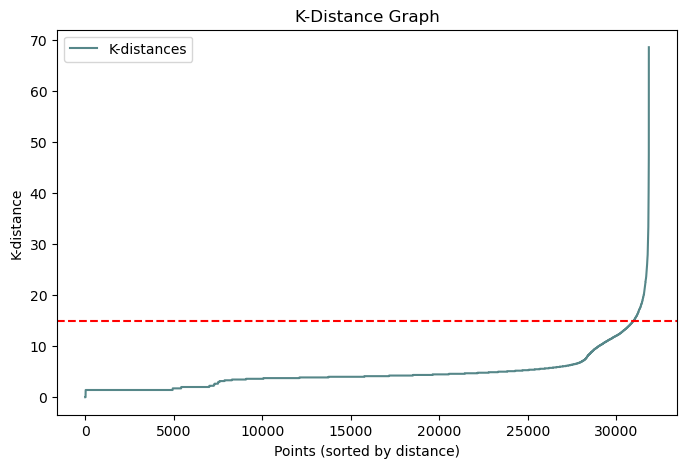

In [35]:
# K-distance graph to find the right eps value
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(temp_data)
distances, _ = neigh.kneighbors(temp_data)
distances = np.sort(distances[:, -1])  

# Plot the distances
plt.figure(figsize=(8, 5))
plt.plot(distances, label="K-distances", color = "#568789")
plt.axhline(y=15, color='red', linestyle='--')
plt.xlabel("Points (sorted by distance)")
plt.ylabel("K-distance")
plt.title("K-Distance Graph")
plt.legend()
plt.show()

**Clustering**

In [34]:
dbscan = DBSCAN(eps=15)  
temp_data['dbscan'] = dbscan.fit_predict(scaled_data)
temp_data['dbscan'].value_counts()

dbscan
 0    31792
-1       36
Name: count, dtype: int64

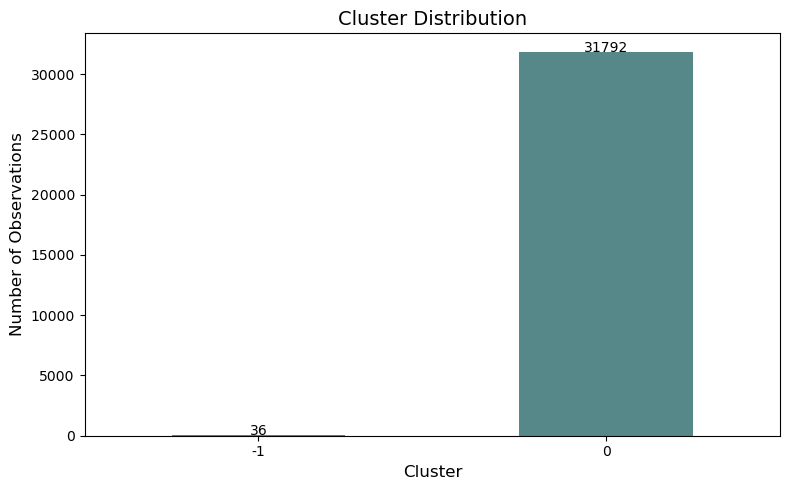

In [28]:
plot_cluster_counts(temp_data, 'dbscan_cluster_1')

In [63]:
db_results = []

# Define clustering settings
cluster_settings = [
    {"model_type": "dbscan", "eps": k, "algorithm": 'ball_tree'}
    for k in range(5, 15)  
] + [
    {"model_type": "dbscan", "eps": k, "algorithm": 'kd_tree'}
    for k in range(5, 15)  
] + [
    {"model_type": "dbscan", "eps": k, "algorithm": 'brute'}
    for k in range(5, 15)  
]

# Loop over settings and evaluate models
for settings in cluster_settings:
    result = create_and_evaluate_model2(df=scaled_data, feats=scaled_data.columns.tolist(), **settings)
    db_results.append(result)

# Convert results to DataFrame
db_results_df = pd.DataFrame(db_results)
db_results_df

,Model,eps,algorithm,R2,Silhouette,Calinski-Harabasz
0,dbscan,5,ball_tree,0.166132,0.644663,6340.732346
1,dbscan,6,ball_tree,0.145727,0.696555,5429.049879
2,dbscan,7,ball_tree,0.125800,0.734912,4579.856858
3,dbscan,8,ball_tree,0.112499,0.764191,4034.254533
4,dbscan,9,ball_tree,0.100199,0.784397,3544.053274
5,dbscan,10,ball_tree,0.084522,0.802586,2938.362907
6,dbscan,11,ball_tree,0.076076,0.815965,2620.558134
7,dbscan,12,ball_tree,0.066859,0.826826,2280.325182
8,dbscan,13,ball_tree,0.059243,0.838771,2004.197416
9,dbscan,14,ball_tree,0.053238,0.847494,1789.634699


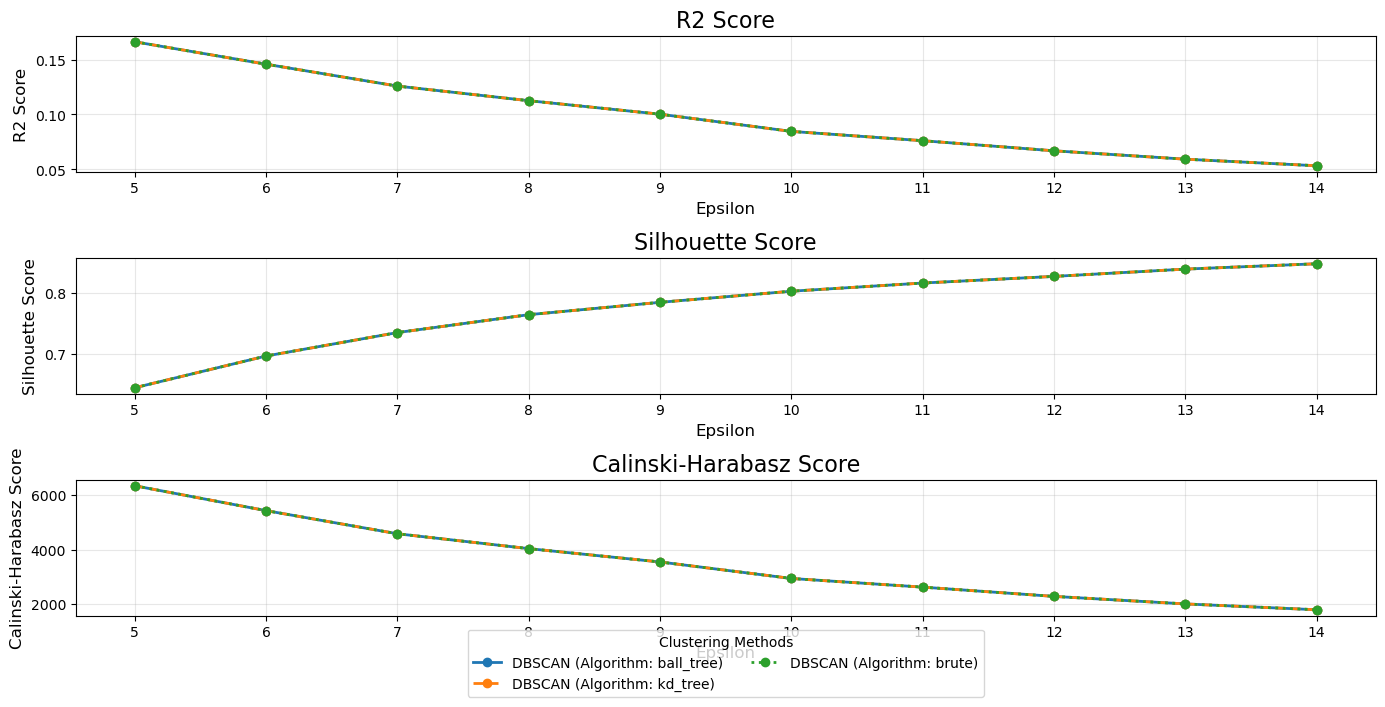

<Figure size 640x480 with 0 Axes>

In [96]:
plot_evaluation_scores(db_results_df, path+'DBScan_scores')

### 2.4.3 HDBScan

<a href="#top">Top &#129033;</a>

In [44]:
hdbscan = HDBSCAN(min_cluster_size = 70, 
                  cluster_selection_method = 'leaf')
temp_data['hdbscan_cluster'] = hdbscan.fit_predict(scaled_data)

In [45]:
temp_data['hdbscan_cluster'].value_counts()

hdbscan_cluster
-1      24480
 1         42
 75        24
 488       24
 310       24
        ...  
 614        5
 8          5
 583        5
 332        5
 517        5
Name: count, Length: 773, dtype: int64

In [28]:
hdb_results = []

# Define clustering settings
cluster_settings = [
    {"model_type": "hdbscan", "min_cluster_size": k, "cluster_selection_method": 'leaf'}
    for k in range(5, 75, 10)  
] + [
    {"model_type": "hdbscan", "min_cluster_size": k, "cluster_selection_method": 'eom'}
    for k in range(5, 75, 10)  
]

# Loop over settings and evaluate models
for settings in cluster_settings:
    result = create_and_evaluate_model2(df=scaled_data, feats=scaled_data.columns.tolist(), **settings)
    hdb_results.append(result)

# Convert results to DataFrame
hdb_results_df = pd.DataFrame(hdb_results)
hdb_results_df

,Model,min_cluster_size,cluster_selection_method,R2,Silhouette,Calinski-Harabasz
0,hdbscan,5,leaf,0.076205,-0.220863,3.318368
1,hdbscan,15,leaf,0.053806,-0.274422,10.054081
2,hdbscan,25,leaf,0.041743,-0.297174,14.705591
3,hdbscan,35,leaf,0.023994,-0.328487,19.536192
4,hdbscan,45,leaf,0.016550,-0.324734,25.487983
5,hdbscan,55,leaf,0.009682,-0.333011,23.926442
6,hdbscan,65,leaf,0.007774,-0.329301,27.700043
7,hdbscan,5,eom,0.077603,-0.222176,3.708592
8,hdbscan,15,eom,0.057083,-0.272964,13.508342
9,hdbscan,25,eom,0.043209,-0.293862,17.921176


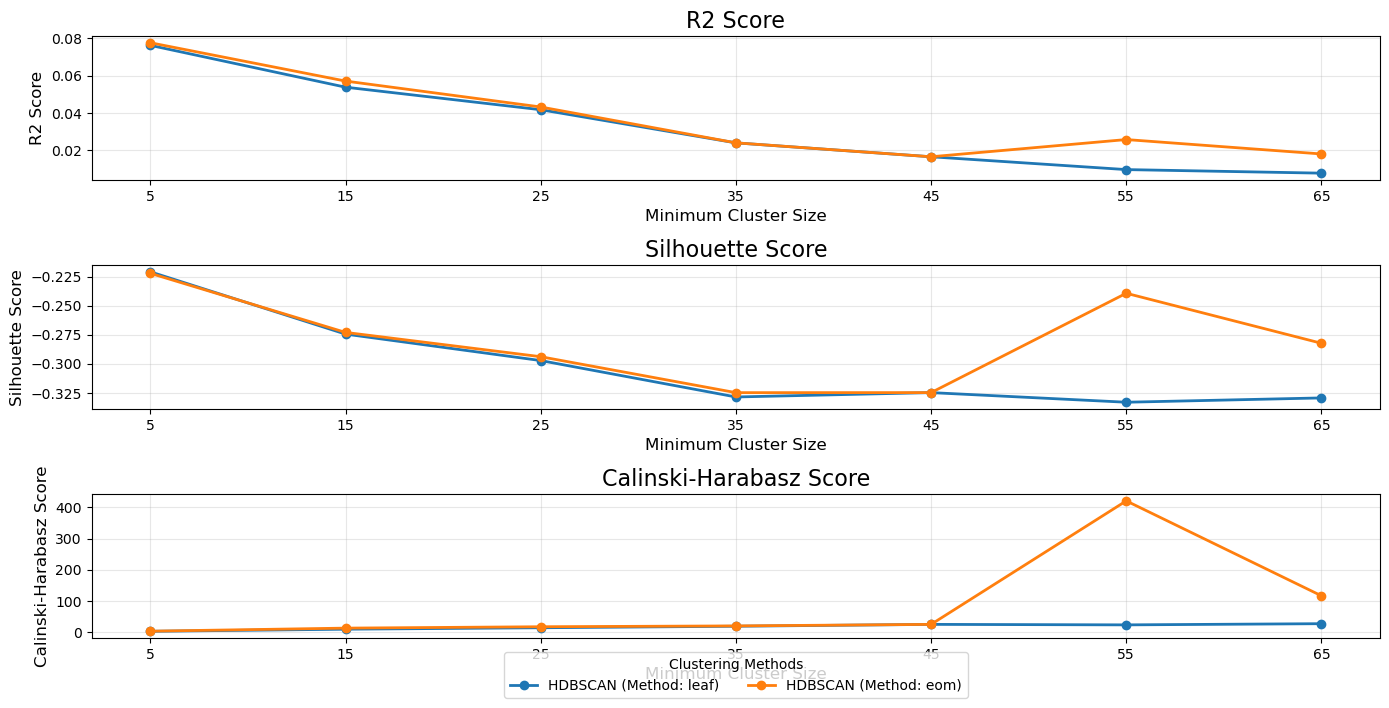

<Figure size 640x480 with 0 Axes>

In [95]:
plot_evaluation_scores(hdb_results_df, path+'HDBScan_scores')

## 2.? UMAP

In [21]:
import umap.umap_ as umap

In [32]:
umap_object = umap.UMAP(n_neighbors=10, min_dist=0.1)

In [33]:
num_ordered = temp_data.sort_index()
umap_embedding = umap_object.fit_transform(num_ordered)

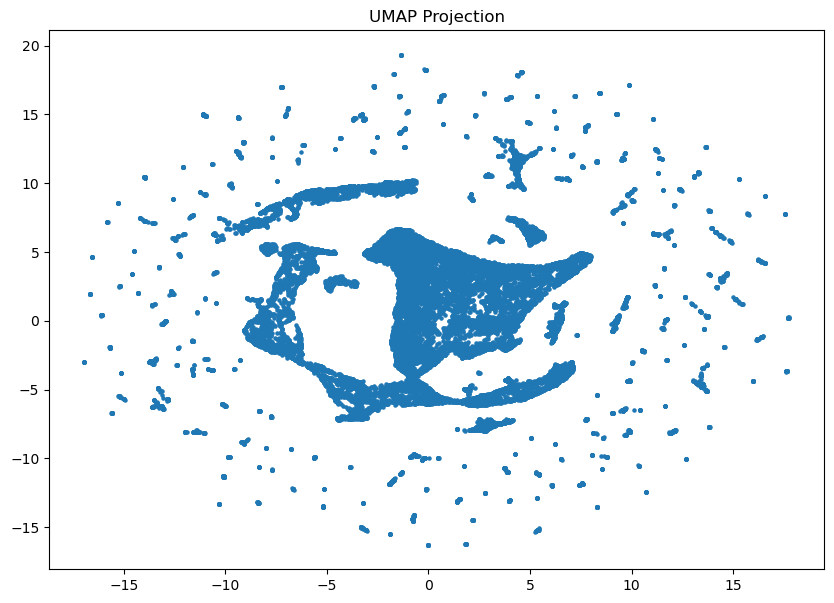

In [34]:
f.plot_dim_reduction(umap_embedding)